# Tabela 8 - Valor médio e quartis do rensidemnto mensal total domicilar per capita nominal, por situação do domicilio.

# Importando dados

In [2]:
import pandas as pd


In [3]:
tab8A = pd.read_excel('Dados/tab8.xls')
tab8A.head(15)

,Unnamed: 0,"Tabela 8 - Valor médio e quartis do rendimento mensal total domiciliar per capita nominal,",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,"por situação do domicílio, segundo os municípi...",NaN,NaN,NaN,NaN
1,NaN,população dos municípios - Maranhão - 2010,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,(continua)
3,Código do município,Municípios e classes de tamanho da população d...,Rendimento mensal total domiciliar per capita ...,NaN,NaN,NaN
4,NaN,NaN,Valor médio\n(R$),Quartis (R$),NaN,NaN
5,NaN,NaN,NaN,1º quartil,2º quartil\n(mediana),3º quartil
6,NaN,Total,NaN,NaN,NaN,NaN
7,NaN,Maranhão,319,85,170,340
8,NaN,Até 5.000,245,62,143,274
9,2105658,Junco do Maranhão,209,75,138,255


# Informações do dataset antes do tratamento

In [4]:
print(f'O atual dataset tem {tab8A.shape[0]} linhas e {tab8A.shape[1]} colunas')
print(f'O atual dataset tem {tab8A.isna().sum().sum()} dados nulos')
tab8A.dtypes

O atual dataset tem 234 linhas e 6 colunas
O atual dataset tem 49 dados nulos


Unnamed: 0                                                                                    object
Tabela 8 - Valor médio e quartis do rendimento mensal total domiciliar per capita nominal,    object
Unnamed: 2                                                                                    object
Unnamed: 3                                                                                    object
Unnamed: 4                                                                                    object
Unnamed: 5                                                                                    object
dtype: object

**Para tratar esse dataset, inicialmente é possivel observar que será necessario:**
* renomear as colunas;
* eliminar os dados nulos; 
* corrigir tipo dos dados de algumas colunas.

# Tratando dataset

## Observando linhas com dados nulos

In [5]:
dados_nulos = tab8A[tab8A.isna().any(axis=1)]
dados_nulos

,Unnamed: 0,"Tabela 8 - Valor médio e quartis do rendimento mensal total domiciliar per capita nominal,",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,"por situação do domicílio, segundo os municípi...",NaN,NaN,NaN,NaN
1,NaN,população dos municípios - Maranhão - 2010,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,(continua)
3,Código do município,Municípios e classes de tamanho da população d...,Rendimento mensal total domiciliar per capita ...,NaN,NaN,NaN
4,NaN,NaN,Valor médio\n(R$),Quartis (R$),NaN,NaN
5,NaN,NaN,NaN,1º quartil,2º quartil\n(mediana),3º quartil
6,NaN,Total,NaN,NaN,NaN,NaN
7,NaN,Maranhão,319,85,170,340
8,NaN,Até 5.000,245,62,143,274
15,NaN,De 5.001 a 10.000,189,45,120,236


As linhas com intervalos podem ser guardadas em um DataFrame a parte e as demais linhas com dados nulos podem ser removidas sem afetas drasticamente o Data Frame

## Guardando linha de intervalos em um Data Frame

In [6]:
intervalos = dados_nulos.iloc[7:15,1:6]
intervalos.columns = ['Intervalos','Renda_media','1_quartil','2_quartil','3_quartil']
intervalos.reset_index(inplace=True,drop=True)
intervalos

,Intervalos,Renda_media,1_quartil,2_quartil,3_quartil
0,Maranhão,319,85,170,340
1,Até 5.000,245,62,143,274
2,De 5.001 a 10.000,189,45,120,236
3,De 10.001 a 20.000,201,55,128,251
4,De 20.001 a 50.000,222,63,134,255
5,De 50.001 a 100.000,266,79,160,297
6,De 100.001 a 500.000,373,128,226,405
7,Mais de 500.000,653,175,329,630


## Removendo linhas com dados nulos

In [7]:
tab8A.dropna(inplace=True)

In [8]:
tab8A.head()

,Unnamed: 0,"Tabela 8 - Valor médio e quartis do rendimento mensal total domiciliar per capita nominal,",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
9,2105658,Junco do Maranhão,209,75,138,255
10,2107258,Nova Colinas,200,34,120,255
11,2107308,Nova Iorque,248,60,153,306
12,2110807,São Félix de Balsas,340,54,130,262
13,2111573,São Pedro dos Crentes,254,78,159,313


## Renomeando colunas

In [9]:
colunas  = ['codigo_municipio','nome_municipio','renda_media','quartil_1','quartil_2','quartil_3']
tab8A.columns = colunas
tab8A.reset_index(inplace=True,drop=True)
tab8A.head()

,codigo_municipio,nome_municipio,renda_media,quartil_1,quartil_2,quartil_3
0,2105658,Junco do Maranhão,209,75,138,255
1,2107258,Nova Colinas,200,34,120,255
2,2107308,Nova Iorque,248,60,153,306
3,2110807,São Félix de Balsas,340,54,130,262
4,2111573,São Pedro dos Crentes,254,78,159,313


## corrigindo tipo de dados

In [10]:
colunas_numericas = ['renda_media','quartil_1','quartil_2','quartil_3']
tab8A[colunas_numericas] = tab8A[colunas_numericas].apply(pd.to_numeric, errors='coerce')
tab8A.dtypes

codigo_municipio    object
nome_municipio      object
renda_media          int64
quartil_1            int64
quartil_2            int64
quartil_3            int64
dtype: object

# Informações do dataset após tratamento

In [11]:
print(f'O dataset atualmente tem {tab8A.shape[0]} linhas e {tab8A.shape[1]} colunas')
print(f'O dataset atualmente tem {tab8A.isna().sum().sum()} dados nulos')
print('\n Informações do dataset:')
tab8A.info()

O dataset atualmente tem 217 linhas e 6 colunas
O dataset atualmente tem 0 dados nulos

 Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   codigo_municipio  217 non-null    object
 1   nome_municipio    217 non-null    object
 2   renda_media       217 non-null    int64 
 3   quartil_1         217 non-null    int64 
 4   quartil_2         217 non-null    int64 
 5   quartil_3         217 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 10.3+ KB


In [12]:
tab8A.renda_media.max()

653

In [13]:
tab8A.renda_media.min()

116

## Definindo numero de classes utilizando regra de sturges

In [14]:
import numpy as np

In [15]:
n = tab8A.shape[0]
n

217

In [16]:
k = 1 + (10/3)*np.log10(n)
k = int(k.round(0))
k

9

Separar em 9 intervalos

In [17]:
labels=list('IHGFEDCBA')
labels

['I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']

In [18]:
pd.cut(x=tab8A.renda_media, bins=k,include_lowest=True,labels=labels).value_counts(sort=False)

I    59
H    94
G    44
F    11
E     4
D     3
C     1
B     0
A     1
Name: renda_media, dtype: int64

In [19]:
pd.Series(pd.cut(x=tab8A.renda_media, bins=k,include_lowest=True)).value_counts(sort=False)

(115.46199999999999, 175.667]    59
(175.667, 235.333]               94
(235.333, 295.0]                 44
(295.0, 354.667]                 11
(354.667, 414.333]                4
(414.333, 474.0]                  3
(474.0, 533.667]                  1
(533.667, 593.333]                0
(593.333, 653.0]                  1
Name: renda_media, dtype: int64

In [20]:
tab8A['classe_de_renda'] = pd.Series(pd.cut(x=tab8A.renda_media, bins=k,include_lowest=True,labels=labels))
tab8A.head()

,codigo_municipio,nome_municipio,renda_media,quartil_1,quartil_2,quartil_3,classe_de_renda
0,2105658,Junco do Maranhão,209,75,138,255,H
1,2107258,Nova Colinas,200,34,120,255,H
2,2107308,Nova Iorque,248,60,153,306,G
3,2110807,São Félix de Balsas,340,54,130,262,F
4,2111573,São Pedro dos Crentes,254,78,159,313,G


As classes de F a A tem uma baixa frequência de ocorrencias, por isso decidi juntar elas apenas como classe A e renomeas as restantes para que fique apenas 4 classes de D a A.

In [21]:
clss = list('FEDCBA')

In [22]:
tab8A.classe_de_renda[tab8A['classe_de_renda'].isin(clss)==True] = 'A'

In [23]:
tab8A.classe_de_renda[tab8A['classe_de_renda'] == 'G'] = 'B'
tab8A.classe_de_renda[tab8A['classe_de_renda'] == 'H'] = 'C'
tab8A.classe_de_renda[tab8A['classe_de_renda'] == 'I'] = 'D'

In [24]:
tab8A_final = tab8A
tab8A_final

,codigo_municipio,nome_municipio,renda_media,quartil_1,quartil_2,quartil_3,classe_de_renda
0,2105658,Junco do Maranhão,209,75,138,255,C
1,2107258,Nova Colinas,200,34,120,255,C
2,2107308,Nova Iorque,248,60,153,306,B
3,2110807,São Félix de Balsas,340,54,130,262,A
4,2111573,São Pedro dos Crentes,254,78,159,313,B
...,...,...,...,...,...,...,...
212,2105302,Imperatriz,527,170,303,510,A
213,2107506,Paço do Lumiar,384,150,255,467,A
214,2111201,São José de Ribamar,395,146,253,450,A
215,2112209,Timon,312,122,204,362,A


In [34]:
tab8A_final.classe_de_renda.cat.remove_unused_categories().value_counts()

C    94
D    59
B    44
A    20
Name: classe_de_renda, dtype: int64

# Exportando dataset para csv

In [26]:
tab8A_final.to_csv('dadosLimpos/tab8A.csv',index=False)

# Analisando renda

In [27]:
import seaborn as sns

In [35]:
frequencia = tab8A_final.classe_de_renda.value_counts()
frequencia

C    94
D    59
B    44
A    20
Name: classe_de_renda, dtype: int64

In [36]:
percentual = tab8A_final.classe_de_renda.value_counts(normalize=True)*100
percentual

C    43.317972
D    27.188940
B    20.276498
A     9.216590
Name: classe_de_renda, dtype: float64

In [37]:
df_freq = pd.DataFrame({'Frequência':frequencia,'Percentual':percentual})
df_freq

,Frequência,Percentual
C,94,43.317972
D,59,27.188940
B,44,20.276498
A,20,9.216590


<AxesSubplot:>

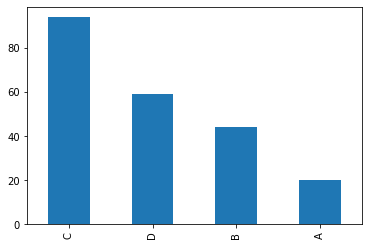

In [38]:
df_freq['Frequência'].plot.bar()

<AxesSubplot:xlabel='renda_media', ylabel='Count'>

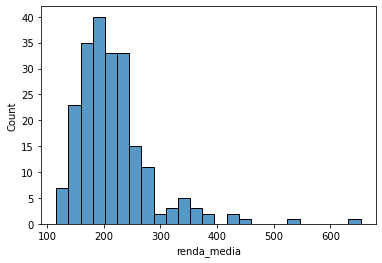

In [40]:
sns.histplot(x='renda_media',data=tab8A_final)